In [ ]:
!pip install nbconvert pandoc

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
db = pd.read_csv('./breast-cancer.csv')
db.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print(db.shape)

(569, 32)


In [5]:
db = db.drop(columns=['id', 'diagnosis'])

In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(db)

In [7]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

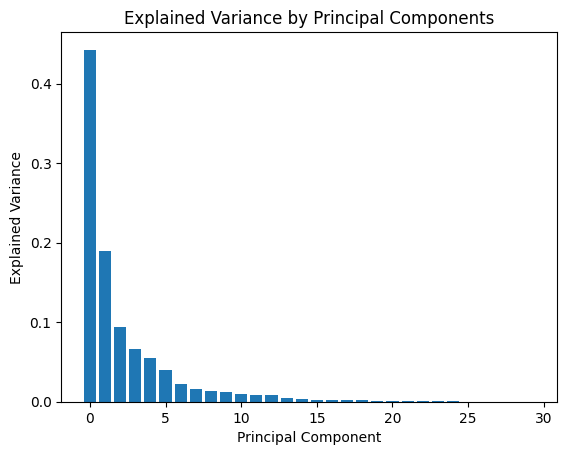

In [8]:
# Visualize explained variance
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

## Varian yang Dijelaskan oleh Setiap Komponen Utama
Varian yang dijelaskan mengukur proporsi dari total varian dataset yang "ditangkap" oleh setiap komponen utama dalam PCA. Varian yang dijelaskan yang tinggi untuk sebuah komponen menunjukkan bahwa komponen tersebut mencakup sejumlah besar informasi (atau varian) yang ada dalam dataset asli. Biasanya, beberapa komponen pertama memiliki varian yang dijelaskan yang lebih tinggi, menangkap pola-pola paling signifikan dalam data

Pada kasus ini, varian bila kita menggunakan 0-5 component principal bisa dibilang masih sangat tinggi..


In [9]:
import numpy as np

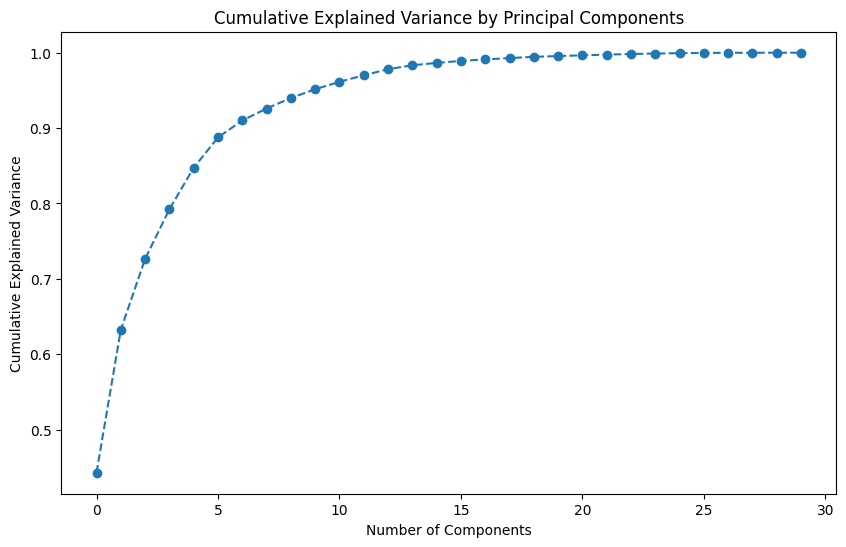

In [10]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

## Varian Kumulatif
Varian kumulatif yang dijelaskan adalah total berjalan dari varian yang dijelaskan dari komponen-komponen utama. Ini membantu dalam memahami berapa banyak komponen yang diperlukan untuk menangkap proporsi yang diinginkan (misalnya, 95% atau 99%) dari total varian dalam dataset. Dengan memplot varian kumulatif yang dijelaskan terhadap jumlah komponen, seseorang dapat menentukan jumlah komponen optimal yang harus dipertahankan, memastikan bahwa sebagian besar informasi asli dipertahankan sambil mengurangi dimensi. Maka dari itu saya akan memilih number of components diatas angka 5


In [11]:
# Tentukan jumlah komponen
n_components = 8

# Lakukan PCA dengan 8 komponen
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

In [12]:
# Convert to DataFrame for better visualization
pca_df = pd.DataFrame(data = principal_components, columns = ['PC' + str(i+1) for i in range(n_components)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159367,-0.398418
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240982
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541450,-0.668163,0.097344
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429917,1.059565
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226492,-0.936213,0.636411
...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375194,-0.596126,-0.035484
565,3.793382,-3.584048,2.088476,-2.506028,-0.510722,-0.246711,-0.716324,-1.113368
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341889
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567938,0.223081,-0.280225


In [13]:
print(principal_components.shape)

(569, 8)


## Kesimpulan

Dengan seperti ini, kita telah mereduksi jumlah fitur yang tadinya ada 32 menjadi 8 fitur, dengan memilih variansi sekecil mungkin dan reduksi data seminimal mungkin

In [14]:
print(pca_df.head)

<bound method NDFrame.head of            PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159367   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013359   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541450 -0.668163   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429917   
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226492 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375194 -0.596126   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510722 -0.246711 -0.716324   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567938  0.223081   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617838  1.698952   

          PC8  
0   -

## Note

Karena ditugas pengenalan pola harus membuat fitur/ mereduksi fitur hingga 3 fitur, maka dibuat lah lagi component baru yang berjumlah 3.

Disclaimer:
Dataset ini mungkin memerlukan jumlah komponen PCA lebih dari 3 karena variansi akan bergantung pada dimensi dari komponenenya, jika menggunakan 3 komponen pca, mungkin hanya mendapatkan variansi sekitar 0,1 hingga 0,2


In [17]:
# Jumlah komponen sesuai tugas
n_components = 3

# Lakukan PCA dengan 3 komponen
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

In [18]:
# Convert to DataFrame for better visualization
pca_df = pd.DataFrame(data = principal_components, columns = ['PC' + str(i+1) for i in range(n_components)])
pca_df


,PC1,PC2,PC3
0,9.192837,1.948586,-1.123145
1,2.387802,-3.768168,-0.529265
2,5.733896,-1.075174,-0.551752
3,7.122953,10.275591,-3.232780
4,3.935302,-1.948068,1.389789
...,...,...,...
564,6.439315,-3.576815,2.459501
565,3.793382,-3.584047,2.088480
566,1.256179,-1.902299,0.562714
567,10.374794,1.672008,-1.877041


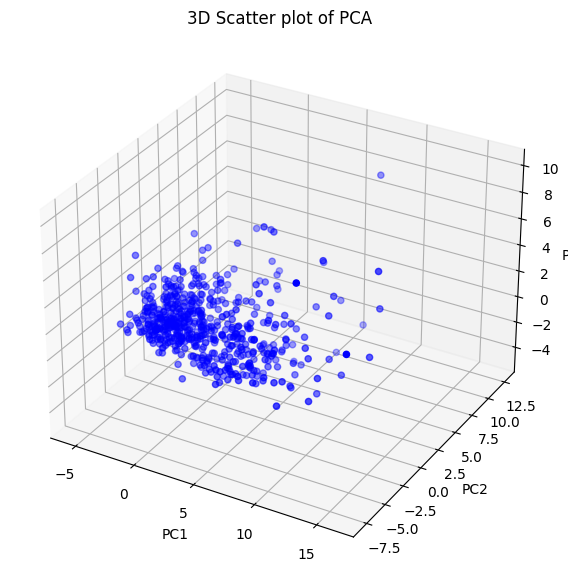

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Membuat plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='b', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter plot of PCA')

plt.show()